# KRK Fault SP vs DP

## Run C++ examples

In [1]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

#1ms simulation
DURATION=20
STARTTIMEFAULT=10
ENDTIMEFAULT=10.2
TIMESTEP=1e-3
TIMESTEPSTR=$(printf "%1.6f\n" ${TIMESTEP})

SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState

[12:20:18.908968 PiLine56 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.909330 PiLine67 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.909708 Piline78_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.910044 Piline78_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.910350 Piline89_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.910671 Piline89_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.910956 PiLine910 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.911272 PiLine1011 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[12:20:18.912457 SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF info] Initialize simulation: SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF
[12:20:18.914252 SP_SynGenTrStab_KRK_TwoAreaTra

In [2]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import os
from datetime import date
import pandas as pd

%matplotlib widget

In [3]:
# Read results
# import villas.dataprocessing.readtools as rt
# from villas.dataprocessing.timeseries import TimeSeries as ts

V_nom = 230e3

work_dir = 'logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF/'
log_name = 'SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF'

print(work_dir + log_name + '.csv')

ts_pfsimpy = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

results=pd.DataFrame()
results = pd.DataFrame(columns=['Bus', 'Voltage Mag [V]', 'Voltage Ang [deg]'])
i = 0

for node,node_data in ts_pfsimpy.items():
    results.loc[i] = [node] + ["{0:.3f}".format(np.absolute(ts_pfsimpy[node].values[-1])/V_nom)] + ["{0:.3f}".format(np.degrees(np.angle(ts_pfsimpy[node].values[-1])))]
    i += 1

print(results)

logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF.csv
column number: 11
results length: 2
real column names: []
complex column names: ['v_bus1', 'v_bus10', 'v_bus11', 'v_bus2', 'v_bus3', 'v_bus4', 'v_bus5', 'v_bus6', 'v_bus7', 'v_bus8', 'v_bus9']
        Bus Voltage Mag [V] Voltage Ang [deg]
0    v_bus1           0.090            27.043
1   v_bus10           0.983           -16.951
2   v_bus11           1.008            -6.635
3    v_bus2           0.088            17.279
4    v_bus3           0.090             0.000
5    v_bus4           0.088           -10.202
6    v_bus5           1.006            20.577
7    v_bus6           0.978            10.493
8    v_bus7           0.961             2.084
9    v_bus8           0.949           -11.780
10   v_bus9           0.971           -25.369


## Results 1ph SP

In [4]:
work_dir = 'logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP/'
log_name = 'SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP'
print(work_dir + log_name + '.csv')
ts_sp1ph_TrStab_dl= rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP.csv
column number: 67
results length: 30000
real column names: ['Ep_gen1', 'Ep_gen2', 'Ep_gen3', 'Ep_gen4', 'P_elec1', 'P_elec2', 'P_elec3', 'P_elec4', 'P_mech1', 'P_mech2', 'P_mech3', 'P_mech4', 'delta_gen1', 'delta_gen2', 'delta_gen3', 'delta_gen4', 'wr_gen1', 'wr_gen2', 'wr_gen3', 'wr_gen4']
complex column names: ['i_gen1', 'i_gen2', 'i_gen3', 'i_gen4', 'i_line1011', 'i_line56', 'i_line67', 'i_line78_1', 'i_line78_2', 'i_line89_1', 'i_line89_2', 'i_line910', 'i_load7', 'i_load9', 'i_trafo15', 'i_trafo26', 'i_trafo311', 'i_trafo410', 'v1', 'v10', 'v11', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v_gen1', 'v_gen2', 'v_gen3', 'v_gen4', 'v_line1011', 'v_line56', 'v_line67', 'v_line78_1', 'v_line78_2', 'v_line89_1', 'v_line89_2', 'v_line910', 'v_load7', 'v_load9', 'v_trafo15', 'v_trafo26', 'v_trafo311', 'v_trafo410']


## Parameters

In [5]:
timestep=50e-6;
t_begin=0
t_end=20

begin_idx = int(t_begin/timestep)
end_idx= int(t_end/timestep)

## Generator terminal voltage

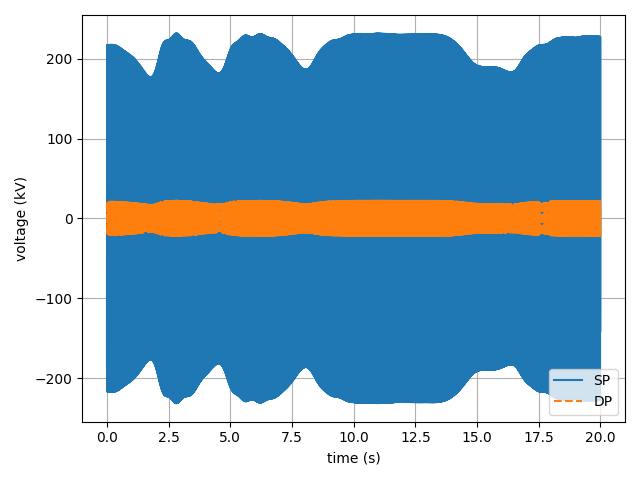

In [7]:
plt.figure()
# plt.title('SMIB generator terminal voltage')
plt.xlabel('time (s)')
plt.ylabel('voltage (kV)')

for name in ['v_trafo15']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='SP')

for name in ['v_gen1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
# plt.xlim(9,11)
# plt.ylim(-300,300)
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], linestyle='--', label='DP')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-800,800)
plt.grid()
plt.tight_layout()


## Genrerator terminal Current

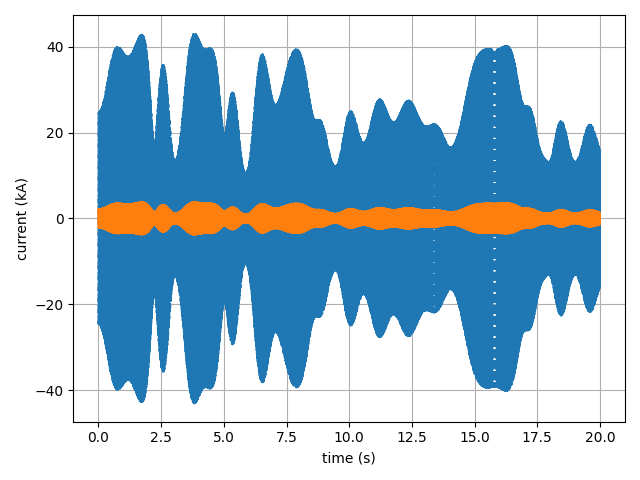

In [8]:
plt.figure()
# plt.title('SMIB generator terminal current')
plt.xlabel('time (s)')
plt.ylabel('current (kA)')


for name in ['i_gen1']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
for name in ['i_trafo15']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='SP')
    
# plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()


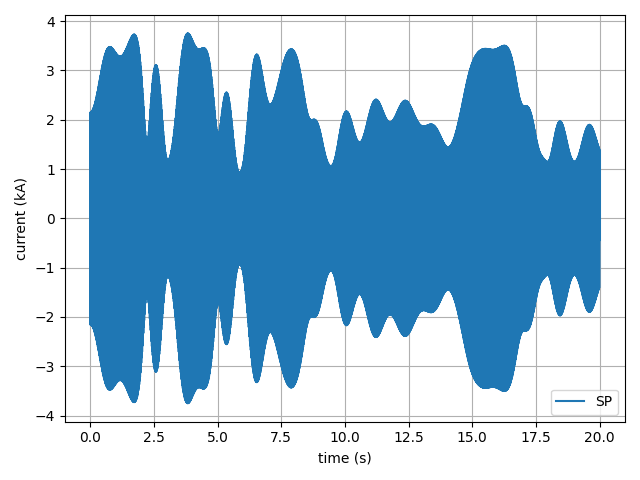

In [9]:
plt.figure()
# plt.title('SMIB generator terminal current')
plt.xlabel('time (s)')
plt.ylabel('current (kA)')


for name in ['i_line56']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='SP')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

## Generator electrical & mechanical energy

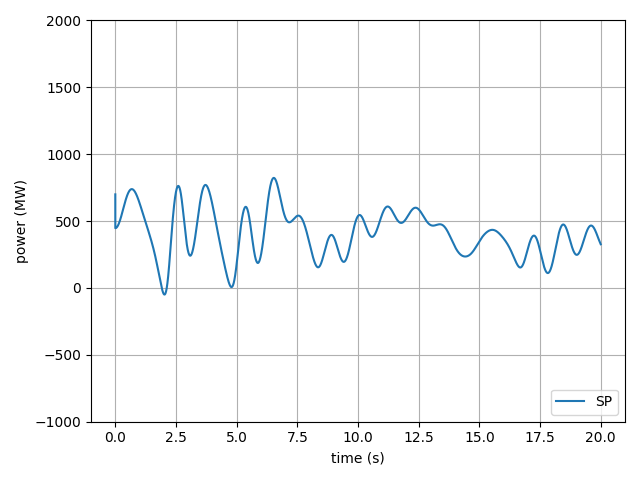

In [10]:
plt.figure()
# plt.title('SMIB generator power')
plt.xlabel('time (s)')
plt.ylabel('power (MW)')

# for name in ['P_elec1']:
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-6*ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-6*ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='REF', color='black', linestyle=':' )
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='DP', linestyle='--')
    
    
for name in ['P_elec1']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')

plt.legend(loc='lower right')
# plt.xlim(9,12)
plt.ylim(-1000, 2000)

plt.grid()
plt.tight_layout()


## Rotor angle $\delta _r$

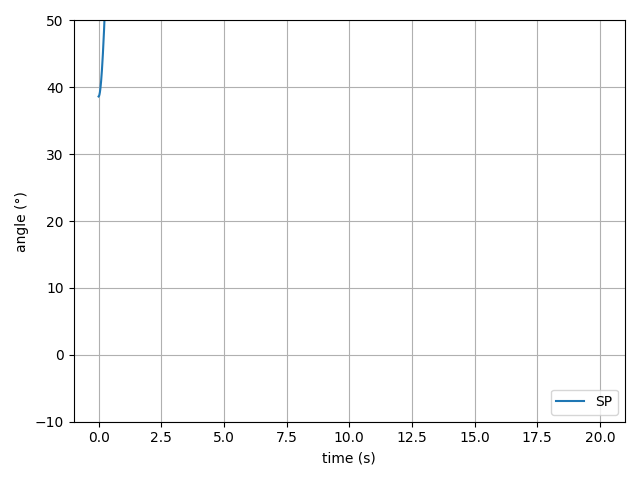

In [11]:
plt.figure()
# plt.title('SMIB Rotor angle')
plt.xlabel('time (s)')
plt.ylabel('angle (°)')

for name in ['delta_gen1']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='SP')
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
plt.ylim(-10,50)

plt.grid()
plt.tight_layout()

# plt.savefig("./plotting/Output/" + str(date.today()) + '_Implementation_SMIB_angle' + '.pdf')
